In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from pathlib import Path


%matplotlib inline 

In [2]:
data_folder = Path.cwd().parent / "data/data_kmeans.parquet"


In [3]:
dataset = pd.read_parquet(data_folder)

In [4]:
dataset2 = dataset[dataset["modelo"]=="GRAND I10"].copy()
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56182 entries, 60462 to 116643
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   vin                     56182 non-null  object
 1   modelo                  56182 non-null  object
 2   visitas                 56182 non-null  int64 
 3   antiquity               56182 non-null  int64 
 4   ultimo_kilometraje      56182 non-null  int64 
 5   num_servicios           56182 non-null  int64 
 6   num_rep_llantas         56182 non-null  int64 
 7   num_rep_frenos          56182 non-null  int64 
 8   num_rep_amortiguadores  56182 non-null  int64 
 9   num_rep_transmision     56182 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 4.7+ MB


In [5]:
dataset2

,vin,modelo,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
60462,MALA74BC0FM057165,GRAND I10,1,113,94550,0,0,0,0,0
60463,MALA74BC0FM057313,GRAND I10,2,111,130233,0,0,0,0,0
60464,MALA74BC0FM057490,GRAND I10,1,114,51921,1,0,2,0,0
60465,MALA74BC0FM057506,GRAND I10,1,112,131489,1,0,0,0,0
60466,MALA74BC0FM063547,GRAND I10,6,110,66309,25,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...
116639,MALB25BCXPM396798,GRAND I10,1,15,10230,2,0,0,0,0
116640,MALB25BCXPM416693,GRAND I10,1,12,2804,1,0,0,0,0
116641,MALB25BCXPM416709,GRAND I10,1,12,1,2,0,0,0,0
116642,MALB25BCXPM416712,GRAND I10,1,12,20039,1,0,0,0,0


In [6]:
grand_i10_variables = dataset2.drop(['vin'], axis=1).drop(['modelo'], axis=1).drop(['antiquity'], axis=1)
grand_i10_variables.head()

,visitas,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
60462,1,94550,0,0,0,0,0
60463,2,130233,0,0,0,0,0
60464,1,51921,1,0,2,0,0
60465,1,131489,1,0,0,0,0
60466,6,66309,25,8,0,0,1


In [7]:
grand_i10_variables.describe()

,visitas,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,56182.000000,5.618200e+04,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000
mean,3.412855,6.882924e+04,4.577249,0.601474,0.126055,0.002474,0.035919
std,2.416645,4.238509e+06,5.371330,2.257758,0.599260,0.060650,0.256404
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.492250e+03,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.784450e+04,3.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,6.048200e+04,6.000000,0.000000,0.000000,0.000000,0.000000
max,32.000000,1.000000e+09,101.000000,37.000000,15.000000,3.000000,8.000000


### Normalizando los datos

In [17]:
data_normalizada = (grand_i10_variables-grand_i10_variables.min()) / (grand_i10_variables.max()-grand_i10_variables.min())
data_normalizada.describe()
data_normalizada.reset_index(inplace=True)
data_normalizada

,index,visitas,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,60462,0.000000,0.000095,0.000000,0.000000,0.000000,0.0,0.000
1,60463,0.032258,0.000130,0.000000,0.000000,0.000000,0.0,0.000
2,60464,0.000000,0.000052,0.009901,0.000000,0.133333,0.0,0.000
3,60465,0.000000,0.000131,0.009901,0.000000,0.000000,0.0,0.000
4,60466,0.161290,0.000066,0.247525,0.216216,0.000000,0.0,0.125
...,...,...,...,...,...,...,...,...
56177,116639,0.000000,0.000010,0.019802,0.000000,0.000000,0.0,0.000
56178,116640,0.000000,0.000003,0.009901,0.000000,0.000000,0.0,0.000
56179,116641,0.000000,0.000000,0.019802,0.000000,0.000000,0.0,0.000
56180,116642,0.000000,0.000020,0.009901,0.000000,0.000000,0.0,0.000


### Búsqueda de la cantidad optima de clusters
- calculo de la similitud de los individuos dentro de los clusters

In [9]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(data_normalizada)
    wcss.append(kmeans.inertia_)

### Gráfica del codo de Jambú

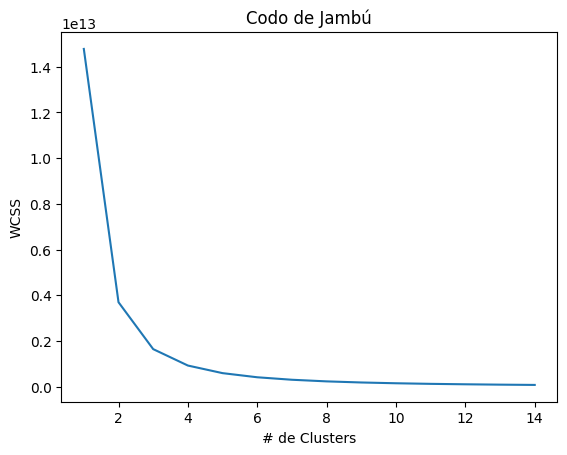

In [10]:
plt.plot(range(1,15), wcss)
plt.title("Codo de Jambú")
plt.xlabel("# de Clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(data_normalizada) ## Aplica el modelo a la base

KMeans(n_clusters=3)

In [19]:
print(clustering.inertia_)

1641997269921.4268


### Aquí se agrega la clasificación al archivo original

In [20]:
dataset2["KMeans_Clustering"] = clustering.labels_
#dataset2.head()
dataset2.reset_index(inplace=True)
dataset2

,level_0,index,vin,modelo,visitas,antiquity,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision,KMeans_Clustering
0,0,60462,MALA74BC0FM057165,GRAND I10,1,113,94550,0,0,0,0,0,0
1,1,60463,MALA74BC0FM057313,GRAND I10,2,111,130233,0,0,0,0,0,0
2,2,60464,MALA74BC0FM057490,GRAND I10,1,114,51921,1,0,2,0,0,0
3,3,60465,MALA74BC0FM057506,GRAND I10,1,112,131489,1,0,0,0,0,0
4,4,60466,MALA74BC0FM063547,GRAND I10,6,110,66309,25,8,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56177,56177,116639,MALB25BCXPM396798,GRAND I10,1,15,10230,2,0,0,0,0,1
56178,56178,116640,MALB25BCXPM416693,GRAND I10,1,12,2804,1,0,0,0,0,1
56179,56179,116641,MALB25BCXPM416709,GRAND I10,1,12,1,2,0,0,0,0,1
56180,56180,116642,MALB25BCXPM416712,GRAND I10,1,12,20039,1,0,0,0,0,1


### Visualizando los clusters
- Utilizando PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_normalizada)

pca_df = pd.DataFrame(data=pca_results, columns=["Componente_1", "Componente_2"])
pca_df_clusters = pd.concat([pca_df, dataset2[["KMeans_Clustering"]]], axis=1)
pca_df_clusters
#pca_df_clusters
#dataset2
#len(pca_results)


,Componente_1,Componente_2,KMeans_Clustering
0,-28090.5,-0.107280,0
1,-28089.5,-0.085505,0
2,-28088.5,-0.073706,0
3,-28087.5,-0.102317,0
4,-28086.5,0.245798,0
...,...,...,...
56177,28086.5,-0.053681,1
56178,28087.5,-0.058641,1
56179,28088.5,-0.053680,1
56180,28089.5,-0.058639,1


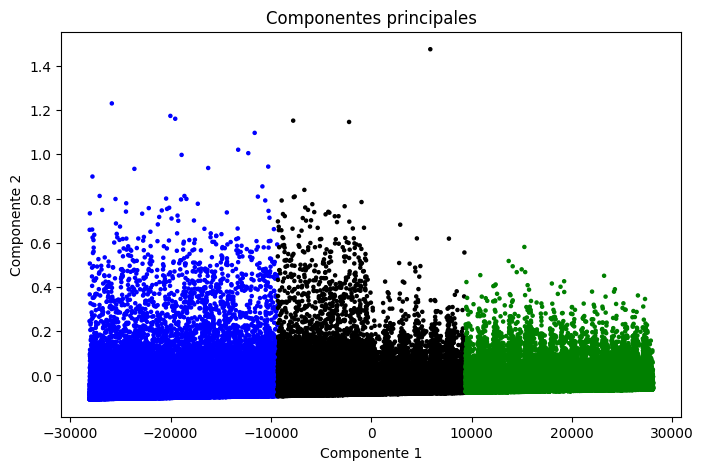

In [22]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_title("Componentes principales")

color_theme = np.array(["blue","green", "black","orange", "purple"])
ax.scatter(x=pca_df_clusters.Componente_1, y=pca_df_clusters.Componente_2,
          c=color_theme[pca_df_clusters.KMeans_Clustering], s=5)

plt.show()


In [16]:
dataset.to_csv("data/i10/output_model_data_grand_i10.csv")

OSError: Cannot save file into a non-existent directory: 'data\i10'